In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
networks = ['net1_reactome','net2_reactome_PRAD','net3_correlation_08','net4_correlation_09','net5_MRrank_10','net6_MRrank_20','net7_MRrank_30','net8_reactome_remap_exprs','net9_reactome_remap_active_inferred','net10_reactome_remap_notriangles']
genes_networks = []
number_of_genes_networks = []

In [3]:
def genes_in_network(network_name,genes):    
    df = pd.read_csv('networks/' + network_name + '.csv',skiprows=1,header=None)
    genes1 = df[0].tolist()
    genes2 = df[1].tolist()
    for g in genes1:
        if g not in genes:
            genes.append(g)
    for g in genes2:
        if g not in genes:
            genes.append(g)  
    return len(genes)

In [4]:
N = len(networks)
for netw in networks:
    print(netw)
    genes = []
    number_of_genes_networks.append(genes_in_network(netw,genes))
    genes_networks.append(genes)    

net1_reactome.csv
net2_reactome_PRAD.csv
net3_correlation_08.csv
net4_correlation_09.csv
net5_MRrank_10.csv
net6_MRrank_20.csv
net7_MRrank_30.csv
net8_reactome_remap_exprs.csv
net9_reactome_remap_active_inferred.csv
net10_reactome_remap_notriangles.csv


In [5]:
df_mut_freq = pd.read_csv('TCGA_PRAD/mutation_freq',skiprows=1,header=None)
df_mut_freq_filtered = df_mut_freq[df_mut_freq[1]>0.015] 
df_mut_freq_super_filtered = df_mut_freq[df_mut_freq[1]>0.05] 
mut_genes = df_mut_freq[0].tolist()
most_mut_genes = df_mut_freq_filtered[0].tolist()
super_mut_genes = df_mut_freq_super_filtered[0].tolist()

In [6]:
mut_genes_in_networks = []
most_mut_genes_in_networks = []
super_mut_genes_in_networks = []
number_of_mut_genes_in_networks = []
number_of_most_mut_genes_in_networks = []
number_of_super_mut_genes_in_networks = [] 
for i in range(len(networks)):
    print(networks[i])
    overlap = []
    overlap_most = []
    overlap_super = []
    for g in mut_genes:
        if g in genes_networks[i]:
            overlap.append(g)
    for g in most_mut_genes:
        if g in genes_networks[i]:
            overlap_most.append(g)
    for g in super_mut_genes:
        if g in genes_networks[i]:
            overlap_super.append(g)
    mut_genes_in_networks.append(overlap)
    number_of_mut_genes_in_networks.append(len(overlap))
    most_mut_genes_in_networks.append(overlap_most)
    number_of_most_mut_genes_in_networks.append(len(overlap_most))  
    super_mut_genes_in_networks.append(overlap_super)
    number_of_super_mut_genes_in_networks.append(len(overlap_super)) 

net1_reactome.csv
net2_reactome_PRAD.csv
net3_correlation_08.csv
net4_correlation_09.csv
net5_MRrank_10.csv
net6_MRrank_20.csv
net7_MRrank_30.csv
net8_reactome_remap_exprs.csv
net9_reactome_remap_active_inferred.csv
net10_reactome_remap_notriangles.csv


In [16]:
print(number_of_mut_genes_in_networks)
c1 = [round(100*x/len(df_mut_freq)) for x in number_of_mut_genes_in_networks]
print(c1)

[4251, 3818, 2769, 643, 5983, 6369, 6436, 5002, 4066, 4066]
[58, 52, 38, 9, 82, 87, 88, 69, 56, 56]


In [18]:
print(number_of_most_mut_genes_in_networks)
c2 = [round(100*x/len(df_mut_freq_filtered)) for x in number_of_most_mut_genes_in_networks]
print(c2)

[38, 36, 15, 3, 40, 46, 47, 44, 37, 37]
[73, 69, 29, 6, 77, 88, 90, 85, 71, 71]


In [19]:
print(number_of_super_mut_genes_in_networks)
c3 = [round(100*x/len(df_mut_freq_super_filtered)) for x in number_of_super_mut_genes_in_networks]
print(c3)

[4, 4, 2, 0, 4, 4, 4, 4, 4, 4]
[100, 100, 50, 0, 100, 100, 100, 100, 100, 100]


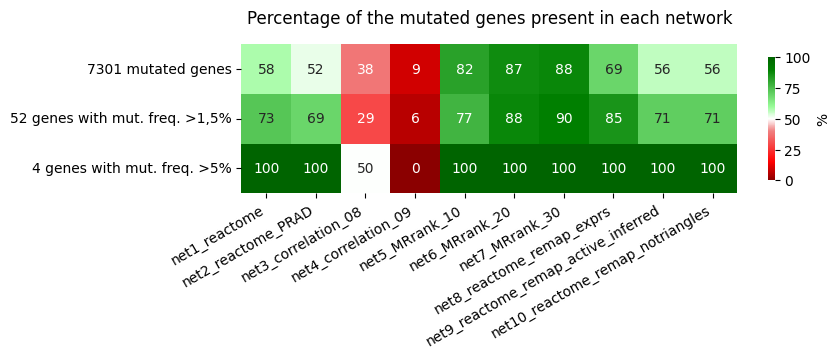

In [93]:
data = {str(len(df_mut_freq)) + ' mutated genes':c1,str(len(df_mut_freq_filtered)) + ' genes with mut. freq. >1,5%':c2,str(len(df_mut_freq_super_filtered)) + ' genes with mut. freq. >5%':c3 }
df_plot = pd.DataFrame(data, index = networks)  
from  matplotlib.colors import LinearSegmentedColormap
c = ["darkred","red","lightcoral","white","palegreen","green","darkgreen"]
v = [0,.15,.4,0.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
hm = sns.heatmap(df_plot.transpose(),ax=ax,square=True,cmap=cmap,annot=True,fmt='g',cbar_kws={'label':'%','shrink':0.2})
hm.set_xticklabels(hm.get_xticklabels(),rotation=30,horizontalalignment='right')
ax.set_title('Percentage of the mutated genes present in each network',pad=15)
plt.savefig('Overlap_data_networks.png',bbox_inches="tight")
plt.show()